In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [2]:
ducks = pd.read_csv("ducks.csv")
ducks.head(25)

,employee_id,first_name,last_name,phone,job_role,work_location,salary,direct_reports,manager,username,password
0,1,Bob,Duck,203-555-5525,manager,Hartford,1000000,"[2, 3]",[],bob.duck,abc123
1,2,Paddles,Flippers,203-535-5525,manager,St. Paul,800000,[4],[1],paddles.flippers,abc124
2,3,Swims,McGee,860-535-5525,HR,Hartford,800000,[5],"[1, 15]",swims.mcgee,abc125
3,4,Michael,Phelps,835-535-6525,employee,Hartford,100000,[],[2],michael.phelps,abc126
4,5,Donald,Duck,234-535-5525,employee,St. Paul,100000,[],[3],donald.duck,abc127
5,6,Melissa,Wells,187-748-4938,HR,New York,80879,[],[15],melissa.wells,6134ubo
6,7,Max,Walker,709-294-5628,HR,Atlanta,88956,[],[15],max.walker,7872axj
7,8,Darcy,Hamilton,592-835-6828,HR,Kansas City,82330,[],[15],darcy.hamilton,8923kya
8,9,Sydney,Richardson,509-686-7425,HR,Hartford,84360,[],[15],sydney.richardson,9773otf
9,10,Kirsten,Tucker,787-401-7620,HR,Atlanta,77406,[],[15],kirsten.tucker,10180gzf


In [3]:
print(ducks.groupby('job_role').size())

job_role
HR           10
employee    803
manager     187
dtype: int64


In [4]:
print(ducks.groupby('work_location').size())

work_location
Atlanta        190
Hartford       189
Kansas City    206
New York       194
St. Paul       221
dtype: int64


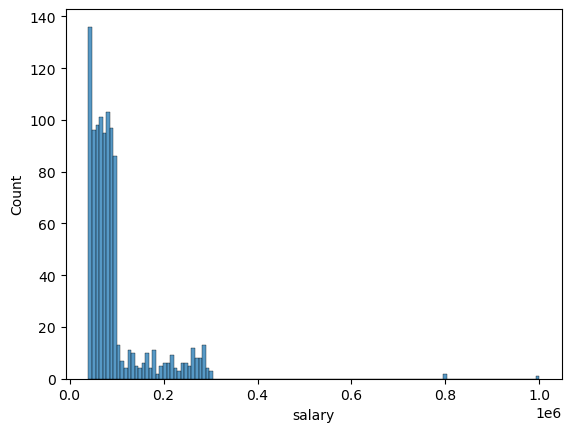

In [5]:
ducks.sort_values(by=['salary'],ascending=False, inplace=True)
count_plot = sns.histplot(ducks, x="salary")
# count_plot.set(xlabel='Empire or Resistance', ylabel='Count')

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error, r2_score

#assign numeric values to categorical data
# homeworld_nums = pd.get_dummies(troops['homeworld'])
# print(homeworld_nums)
# unit_type_nums = pd.get_dummies(troops['unit_type'])
# print(unit_type_nums)
labels = ducks['salary'].to_frame()
num_values = pd.get_dummies(ducks[['job_role', 'work_location']])
#print(num_values)

learner_input_df = pd.concat([num_values, labels], axis=1)
learner_input_df.head(5)


# troops.homeworld = troops.homeworld.astype('category').cat.codes
# troops.unit_type = troops.unit_type.astype('category').cat.codes
# troops

,job_role_HR,job_role_employee,job_role_manager,work_location_Atlanta,work_location_Hartford,work_location_Kansas City,work_location_New York,work_location_St. Paul,salary
0,False,False,True,False,True,False,False,False,1000000
2,True,False,False,False,True,False,False,False,800000
1,False,False,True,False,False,False,False,True,800000
188,False,False,True,False,False,True,False,False,299492
139,False,False,True,False,False,False,True,False,299052


In [7]:
#split dataset in features and target variable
# feature_cols = ['homeworld', 'unit_type']
# X = troops[feature_cols] # Features
# Y = troops['is_resistance'] # Target variable

X = learner_input_df.iloc[:, 0:8]
Y = learner_input_df.salary

# store feature names from X header to make importance graph later
feature_names = X.columns.values.tolist()
print(feature_names)

labels=ducks['salary']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Create Decision Tree classifer object
regr = LinearRegression()

# Train Regression Model
regr = regr.fit(X_train, Y_train)

#Predict the response for test dataset
Y_pred = regr.predict(X_test)

# # evaluate success of model
# The coefficients
coefficients = regr.coef_
print("Coefficients: \n", coefficients)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y_test, Y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Y_test, Y_pred))

['job_role_HR', 'job_role_employee', 'job_role_manager', 'work_location_Atlanta', 'work_location_Hartford', 'work_location_Kansas City', 'work_location_New York', 'work_location_St. Paul']
Coefficients: 
 [-35926.52446303 -48713.44856033  84639.97302336  -2603.22903367
   6143.67740113  -6657.433445     1788.87351193   1328.11156562]
Mean squared error: 3756173430.85
Coefficient of determination: 0.43


In [8]:
coeff_df = pd.DataFrame(coefficients, columns=["coefficients"])
coeff_df['features'] = feature_names
coeff_df.sort_values(by="coefficients", ascending=False, inplace=True)

In [9]:
print(coeff_df)

   coefficients                   features
2  84639.973023           job_role_manager
4   6143.677401     work_location_Hartford
6   1788.873512     work_location_New York
7   1328.111566     work_location_St. Paul
3  -2603.229034      work_location_Atlanta
5  -6657.433445  work_location_Kansas City
0 -35926.524463                job_role_HR
1 -48713.448560          job_role_employee


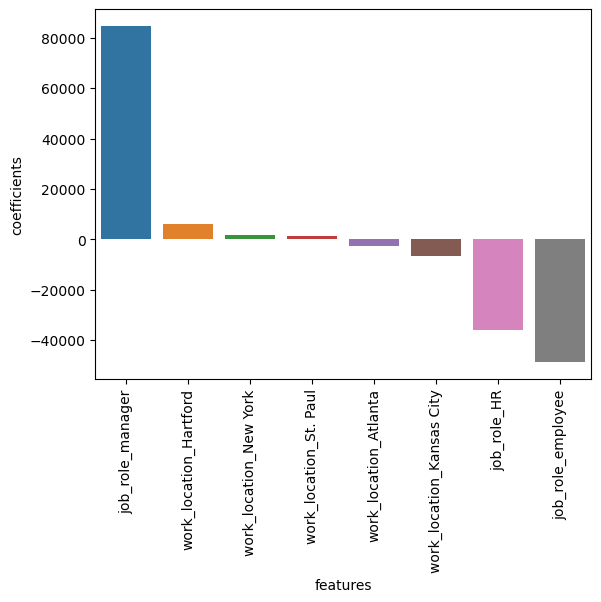

In [10]:
bar_graph = sns.barplot(coeff_df, x="features", y="coefficients", orient="v")
bar_graph.set_xticklabels(bar_graph.get_xticklabels(), rotation=90)
fig = bar_graph.get_figure()
fig.savefig('feature_importance_chart.png', bbox_inches='tight')

In [11]:
import pickle

pickle_path = 'server/trained_model.pkl'
regr_pickle = open(pickle_path, 'wb')
pickle.dump(regr, regr_pickle)
regr_pickle.close()

In [12]:
pickle_path = 'server/trained_model.pkl'
regr_unpickle = open(pickle_path, 'rb')
regr_model = pickle.load(regr_unpickle)

In [26]:
# job_role = "HR"
# work_location = "Hartford"
# pickle_path = 'server/trained_model.pkl'
# regr_unpickle = open(pickle_path, 'rb')
# regr_model = pickle.load(regr_unpickle)
# new_df = pd.DataFrame([[False, False, False, False, False, False, False, False]], columns=regr_model.feature_names_in_)
# # print(regr_model.feature_names_in_)
# if (job_role == "HR"):
#     new_df.at[0, 'job_role_HR'] = True
# if (job_role == "employee"):
#     new_df.at[0, 'job_role_employee'] = True
# if (job_role == "manager"):
#     new_df.at[0, 'job_role_manager'] = True
# if (work_location =="Hartford"):
#     new_df.at[0, 'work_location_Hartford'] = True
# if (work_location =="St. Paul"):
#     new_df.at[0, 'work_location_St. Paul'] = True
# if (work_location =="New York"):
#     new_df.at[0, 'work_location_New York'] = True
# if (work_location =="Kansas City"):
#     new_df.at[0, 'work_location_Kansas City'] = True
# if (work_location =="Atlanta"):
#     new_df.at[0, 'work_location_Atlanta'] = True
# # print(new_df)
# results = regr_model.predict(new_df)
# print(results)

['job_role_HR' 'job_role_employee' 'job_role_manager'
 'work_location_Atlanta' 'work_location_Hartford'
 'work_location_Kansas City' 'work_location_New York'
 'work_location_St. Paul']
   job_role_HR  job_role_employee  job_role_manager  work_location_Atlanta  \
0         True              False             False                  False   

   work_location_Hartford  work_location_Kansas City  work_location_New York  \
0                    True                      False                   False   

   work_location_St. Paul  
0                   False  
[87708.92707875]
